In [1]:
from sklearn.decomposition import PCA

In [2]:
pca = PCA(n_components = 50)      # 주성분의 개수는 50

In [3]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2024-05-01 09:11:12--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-05-01 09:11:12--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-05-01 09:11:13--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [4]:
import numpy as np
fruits = np.load('/content/fruits_300.npy')
fruits.shape

(300, 100, 100)

In [5]:
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape

(300, 10000)

In [6]:
fruits_2d_pca = pca.fit_transform(fruits_2d)
fruits_2d_pca.shape

(300, 50)

In [7]:
pca.components_.shape     # 주성분을 추출해서 다시 시각화 -> 재구성 가능

(50, 10000)

In [8]:
# PCA는 시각화할 떄 도움이 됨

비지도 과일 데이터
   - 정답 라벨을 부여해서 지도 학습으로 변경
   - 차수변경 없이 동일한 분류 모델로 교차 검증을 PCA와 비교해서
   - 성능과 시간을 측정

In [9]:
target = [0]*100 + [1]*100 + [2]*100

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fruits_2d, target, stratify=target, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rfc = RandomForestClassifier()

score = cross_validate(rfc, fruits_2d, target, return_train_score=True)
score_pca = cross_validate(rfc, fruits_2d_pca, target, return_train_score=True)

In [12]:
score['fit_time'].mean(), score['score_time'].mean(),score['train_score'].mean(),score['test_score'].mean()

(0.44844231605529783, 0.0078460693359375, 1.0, 0.9966666666666667)

In [13]:
score_pca['fit_time'].mean(), score_pca['score_time'].mean(),score_pca['train_score'].mean(),score_pca['test_score'].mean()

(0.25305767059326173, 0.007857513427734376, 1.0, 0.9966666666666667)

시각화
 - pca component 수를 2개로 압축

In [14]:
pca = PCA(n_components=2)
fruits_2d_pca_2dim = pca.fit_transform(fruits_2d)
fruits_2d_pca_2dim.shape    # (300,2)

(300, 2)

In [15]:
import matplotlib.pyplot as plt

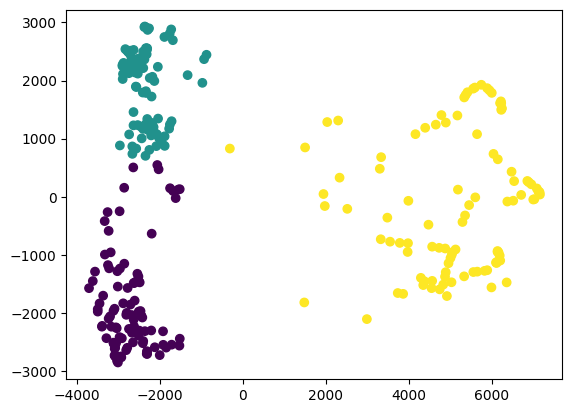

In [16]:
plt.scatter(fruits_2d_pca_2dim[:,0], fruits_2d_pca_2dim[:,1], c=target)
plt.show()

In [17]:
# 군집 분류
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, n_init=10)
km.fit(fruits_2d_pca_2dim)

KMeans(n_clusters=3, n_init=10)

In [18]:
import numpy as np
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

In [19]:
km=KMeans(n_clusters=3,n_init=10)
km.fit(fruits_2d)
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))

In [20]:
import tensorflow as tf

# Keras를 TensorFlow에서 가져옴
from tensorflow import keras


# 기존의 이미지(저해상도)를 수치화함
(X_train, y_train),(X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train, y_train)
print(X_test, y_test)

4422102/4422102 [==============================] - 0s 0us/step
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] [9 0 0 ... 3 0 5]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 

In [21]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [22]:
# 스케일링 필수
X_train_scaled = (X_train / 255.0).reshape(-1,28*28)
X_test_scaled = (X_test / 255.0).reshape(-1,28*28)
X_train_scaled.shape, X_test_scaled.shape

((60000, 784), (10000, 784))

In [23]:
from sklearn.linear_model import SGDClassifier
# SGDClassifier 로지스틱 함수(시그모이드)를 사용하는 이진분류에 특화된 모델
# 'one-vs-rest(OvR)전략을 사용한다.--다중 분류에도 사용할 수 있음. 손실함수는 log함수를 사용
sgdc = SGDClassifier(loss = 'log_loss')
scores = cross_validate(sgdc, X_train_scaled, y_train, return_train_score=True)
scores['train_score'].mean(),scores['test_score'].mean()

(0.8616250000000001, 0.8457666666666667)

인공신경망 만들기
- 층 정의
- 층들을 Sequential에 넣어서 연결한다. -> 모델

In [ ]:
from sklearn.model_selection import train_test_split
XX_train, XX_val, yy_train, yy_val = train_test_split(X_train_scaled,y_train,stratify=y_train,random_state=42)

In [ ]:
XX_train.shape

(45000, 784)

In [ ]:
dense = keras.layers.Dense(10, activation='softmax', input_shape = (XX_train.shape[1], ))       #(784,)
model = keras.Sequential(dense)

In [ ]:
model.summary()     # 784+1 -> class 1개를 예측 784*10 + 1*10 -> 7850

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 이진분류 binary_crossentropy
# 다중분류 categorical_crossentropy --> 레이블이 one hot으로 처리되었을 떄
# 다중분류 sparse_categorical_crossentropy --> 레이블이 one hot으로 처리되지 않았을 떄
model.compile(loss = 'sparse_categorical_crossentropy',metrics='acc')     # acc->accuracy

In [ ]:
model.fit(XX_train,yy_train,epochs=10, validation_data=(XX_val,yy_val))

Epoch 1/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4834 - acc: 0.8356 - val_loss: 0.4503 - val_acc: 0.8469
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.4575 - acc: 0.8456 - val_loss: 0.4609 - val_acc: 0.8412
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4444 - acc: 0.8496 - val_loss: 0.4225 - val_acc: 0.8584
Epoch 4/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4363 - acc: 0.8514 - val_loss: 0.4486 - val_acc: 0.8495
Epoch 5/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4295 - acc: 0.8546 - val_loss: 0.4262 - val_acc: 0.8543
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4252 - acc: 0.8558 - val_loss: 0.4555 - val_acc: 0.8465
Epoch 7/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4206 - acc: 0.8595 - val_loss: 0.4172 - val_acc: 0.8616
Epoch 8/10
1407/1407 [==============================] - 4s 3ms

In [ ]:
# fit()은 누적학습이므로 모델을 다시 만들고 실행시켜야함

In [ ]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4647 - acc: 0.8454


[0.46469154953956604, 0.8453999757766724]

In [ ]:
X_test_scaled[10:15], y_test[10:15]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([4, 5, 7, 3, 4], dtype=uint8))

In [ ]:
import numpy as np

predict = model.predict(X_test_scaled[10:15])
[data[-1] for data in np.argsort(predict)]

1/1 [==============================] - 0s 75ms/step


[4, 5, 5, 3, 4]

인공신경망 - 단일 신경망(퍼셉트론)
  - Dense 층을 구성, 입력 데이터 모양, 활성화 함수, 출력 뉴런의 개수
    - keras, layers, Dense,(10,activation='softmax', input_shape(384,)
  - sequence로 층을 연결
    - model = keras.Sequencial(dense)
  - 모델이 나오면 compile
  compile : 손실함수, 평가방법
    - model.compile(loss=' ', metrics='acc')
  - 학습 : fit, 에포크수
    - model.fit(x,y,epochs=50, validation_data=(XX_val,yy_val)

In [ ]:
# 붓꽃
from sklearn.datasets import load_iris
data = load_iris()
X = data.data; y = data.target
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

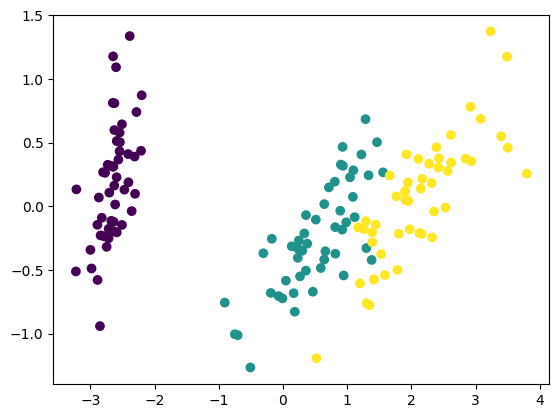

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.show()

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow import keras

In [ ]:
X.shape

(150, 4)

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,stratify=y, random_state=42)

In [ ]:
dense = Dense(3,activation='softmax',input_shape=(4, ))
model = Sequential([dense])
model.compile(loss = keras.losses.sparse_categorical_crossentropy, metrics='accuracy')
model.fit(X_train,y_train,validation_split=0.2,epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 131ms/step - loss: 1.5233 - accuracy: 0.1910 - val_loss: 1.5862 - val_accuracy: 0.2174
Epoch 2/100
3/3 [==============================] - 0s 33ms/step - loss: 1.4635 - accuracy: 0.1461 - val_loss: 1.5482 - val_accuracy: 0.1739
Epoch 3/100
3/3 [==============================] - 0s 47ms/step - loss: 1.4317 - accuracy: 0.1236 - val_loss: 1.5198 - val_accuracy: 0.1304
Epoch 4/100
3/3 [==============================] - 0s 52ms/step - loss: 1.4042 - accuracy: 0.1236 - val_loss: 1.4962 - val_accuracy: 0.1739
Epoch 5/100
3/3 [==============================] - 0s 36ms/step - loss: 1.3804 - accuracy: 0.1236 - val_loss: 1.4743 - val_accuracy: 0.1739
Epoch 6/100
3/3 [==============================] - 0s 44ms/step - loss: 1.3601 - accuracy: 0.1461 - val_loss: 1.4528 - val_accuracy: 0.1304
Epoch 7/100
3/3 [==============================] - 0s 49ms/step - loss: 1.3410 - accuracy: 0.1685 - val_loss: 1.4319 - val_accuracy: 0.1304
Epoch 8/100
3/3 [==